In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
diabetes = pd.read_csv('diabetes.csv')

In [3]:
print(diabetes.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [4]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
print("Dimensions of diabetes data:{}".format(diabetes.shape))

Dimensions of diabetes data:(768, 9)


In [6]:
print(diabetes.groupby("Outcome").size())

Outcome
0    500
1    268
dtype: int64


In [7]:
import seaborn as sns

<IPython.core.display.Javascript object>


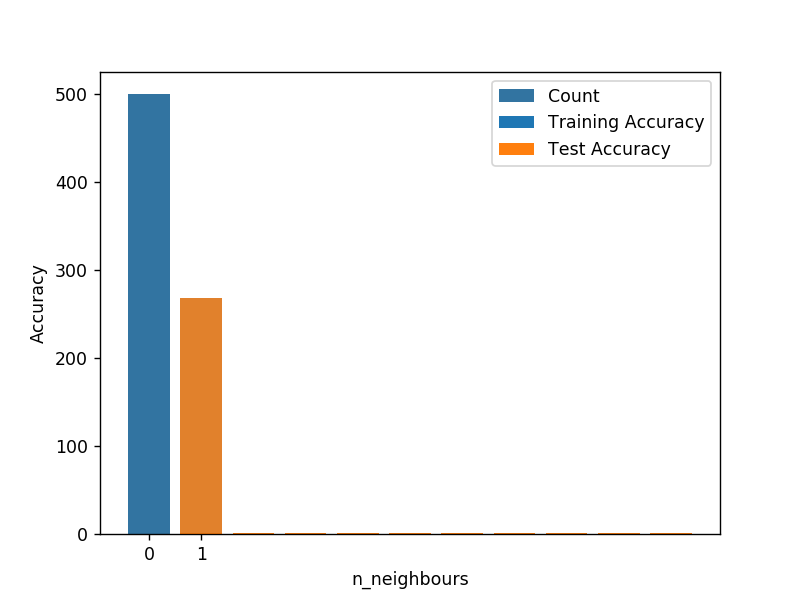

In [8]:
sns.countplot(diabetes["Outcome"],label = 'Count')

In [9]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# K-Nearest Neighbors

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train , X_test  , y_train , y_test = train_test_split(diabetes.loc[:, diabetes.columns != 'Outcome'] , diabetes['Outcome'] , stratify = diabetes['Outcome'] , random_state = 66)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
training_accuracy = []
test_accurecy = []
# try neighbr from 1 to 10
neighbors_settings = range(1,11)
for n_neighbors in neighbors_settings:
    #build the model
    knn = KNeighborsClassifier(n_neighbors= n_neighbors)
    knn.fit(X_train , y_train)
    #record training set accuracy
    training_accuracy.append(knn.score(X_train , y_train))
    # record test accuracy
    test_accurecy.append(knn.score(X_test , y_test))


In [45]:
plt.bar(neighbors_settings , training_accuracy , label = 'Training Accuracy')
plt.bar(neighbors_settings , test_accurecy , label = "Test Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('n_neighbours')
plt.legend()

TypeError: 'str' object is not callable

In [15]:
knn = KNeighborsClassifier(n_neighbors= 12)
knn.fit(X_train , y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=12, p=2,
           weights='uniform')

In [16]:
print("Accuracy of KNN classifier on training set:{:.2f}".format(knn.score(X_train , y_train)))

Accuracy of KNN classifier on training set:0.79


In [17]:
print("Accuracy of KNN classifier on Test set:{:.2f}".format(knn.score(X_test , y_test)))

Accuracy of KNN classifier on Test set:0.77


# Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
logreg = LogisticRegression().fit(X_train , y_train)
print("Training set Score:{:.3f}".format(logreg.score(X_train , y_train)))

Training set Score:0.781


In [20]:
print("Test set Score:{:.3f}".format(logreg.score(X_test , y_test)))

Test set Score:0.771


In [21]:
logReg001 = LogisticRegression(C = 0.01).fit(X_train , y_train)
print("Training Set Score:{:.3f}".format(logReg001.score(X_train , y_train)))

Training Set Score:0.700


In [22]:
print("Test Set Score:{:.3f}".format(logReg001.score(X_test , y_test)))

Test Set Score:0.703


<IPython.core.display.Javascript object>


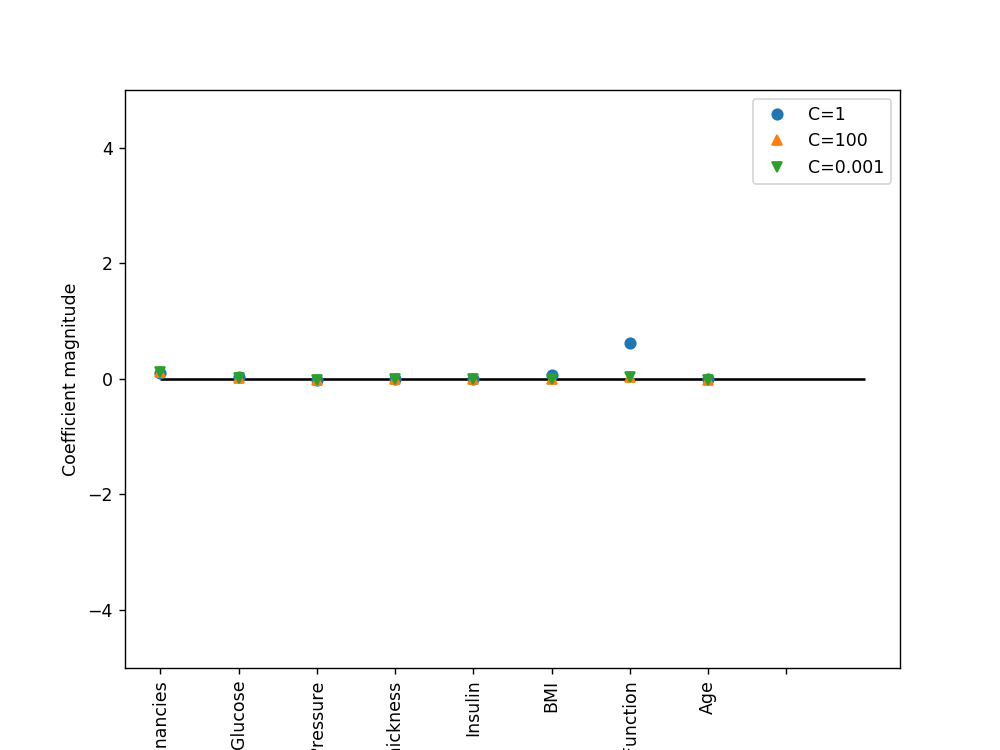

In [23]:
diabetes_features = [x for i,x in enumerate(diabetes.columns) if i != 8]
plt.figure(figsize=(8,6))
plt.plot(logreg.coef_.T , 'o' , label = 'C=1')
plt.plot(logReg001.coef_.T , '^' , label = 'C=100')
plt.plot(logReg001.coef_.T , 'v' , label = 'C=0.001')
plt.xticks(range(diabetes.shape[1]), diabetes_features, rotation=90)
plt.hlines(0, 0, diabetes.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.savefig('log_coef')

# Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
tree = DecisionTreeClassifier(max_depth= 3, random_state = 0)
tree.fit(X_train , y_train)
print("Training Set:{:.3f}".format(tree.score(X_train , y_train)))

Training Set:0.773


In [26]:
print("Test Set:{:.3f}".format(tree.score(X_test , y_test)))

Test Set:0.740


In [27]:
print("Feature_importence:\n{}".format(tree.feature_importances_))

Feature_importence:
[0.04554275 0.6830362  0.         0.         0.         0.27142106
 0.         0.        ]


In [28]:
# visualize the feature importence
def plot_feature_importances_diabetes(model):
    plt.figure(figsize = (8,6))
    n_features = 8
    plt.barh(range(n_features) , model.feature_importances_, align = 'center' )
    plt.yticks(np.arange(n_features) , diabetes_features)
    plt.xlabel = ("Feature Importance")
    plt.ylabel = ("Feature")
    plt.ylim = (-1 , n_features)

<IPython.core.display.Javascript object>


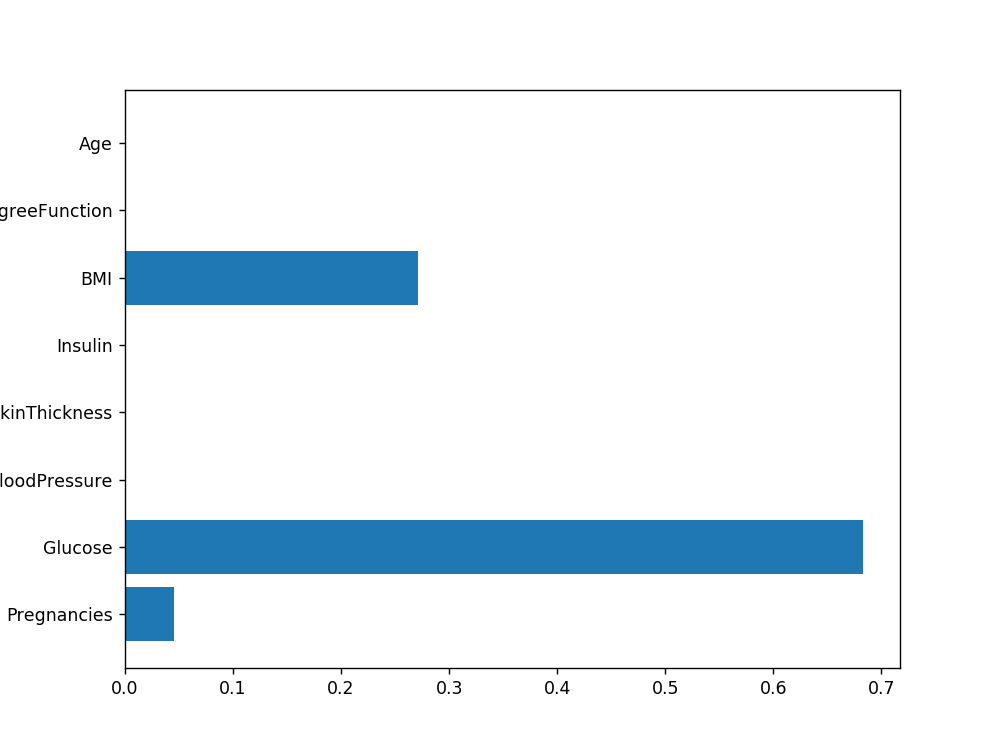

In [29]:
plot_feature_importances_diabetes(tree)

# Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [31]:
rf = RandomForestClassifier(n_estimators= 100 , random_state= 0 )
rf.fit(X_train , y_train)
print("Training Data Set:{:.3f}".format(rf.score(X_train , y_train)))

Training Data Set:1.000


In [32]:
print("Test Data Set:{:.3f}".format(rf.score(X_test , y_test)))

Test Data Set:0.786


In [33]:
rf1 = RandomForestClassifier(max_depth= 3 , random_state= 0 , n_estimators= 100)
rf1.fit(X_train , y_train)
print("Accurecy on training Set:{:.3f}".format(rf1.score(X_train , y_train)))

Accurecy on training Set:0.800


In [34]:
print("Accurecy on Test Set:{:.3f}".format(rf1.score(X_test , y_test)))

Accurecy on Test Set:0.755


<IPython.core.display.Javascript object>


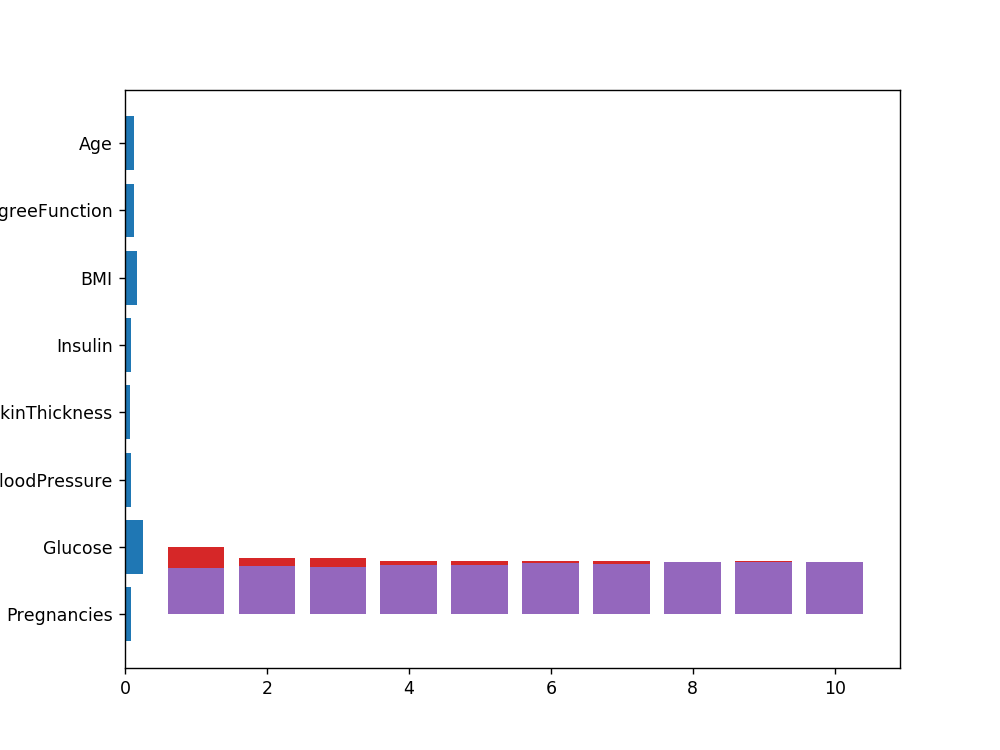

In [35]:
plot_feature_importances_diabetes(rf)

# Support Vector Machine(SVM)

In [36]:
from sklearn.svm import SVC

In [37]:
svc = SVC()

In [38]:
svc.fit(X_train , y_train)
print("Accuracy on training Set:{:.2f}".format(svc.score(X_train , y_train)))

Accuracy on training Set:1.00


In [39]:
print("Accuracy on test set:{:.2f}".format(svc.score(X_test , y_test)))

Accuracy on test set:0.65


In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler = MinMaxScaler()

In [42]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
svc = SVC()
svc.fit(X_train , y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.65
Accuracy on test set: 0.65


In [43]:
svc = SVC(C = 1000)
svc.fit(X_train , y_train)
print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.651
Accuracy on test set: 0.651


# -----------------------Completed-------------------------------------------